In [1]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import random
import math

%matplotlib inline

np.random.seed(1234)

# 08. 高等统计学
我们希望通过特定的样本数据，推断出总体的特征。为了做到这一点，我们需要使用假设检验等方法，评估样本对总体的描述情况。

## 8.1 点估计
通常，获得总体参数非常困难，甚至是难以实现的，所以我们通过计算样本的统计量得到总体参数。`点估计`(point estimates)指通过样本数据估计总体参数。

我们可以使用点估计的方法对总体均值、方差等统计量进行估计。为了得到估计值，我们只需将被计算对象由总体变为样本即可。比如，我们希望知道某公司有9000名员工平均每天休息的时长。我们可以从9000人中抽取一个样本，计算样本的平均值。样本平均值就是我们的`点估计`。 

下面我们通过Python模拟总体数据，规则如下：
1. 根据`第6章 高等概率论`，如果已知事件的平均值，那么通常使用`泊松随机变量`对事件进行建模。我们用泊松分布随机生成9000个调查问卷的答案：你平均每天休息的时长是多少？(*请注意，总体的均值一般很难直接获取。本例计算总体的均值是为了将总体参数和样本做比较，以便你更深入地理解点估计。*)
2. 从总体中随机抽取100名员工组成样本，计算样本均值(总体均值的点估计) 
3. 对比样本均值和全体均值

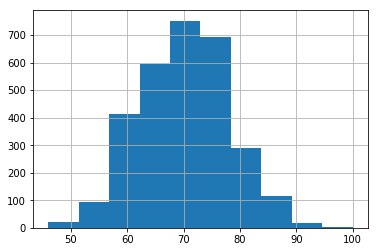

In [2]:
long_breaks = stats.poisson.rvs(loc=10, mu=60, size=3000)

pd.Series(long_breaks).hist()

`long_breaks`代表3000名员工的调查问卷结果，他们的平均休息时长是`60 min`。 

继续用泊松分布模拟另外`6000`名员工的调查问卷结果，他们的平均休息时长为`15 min`：

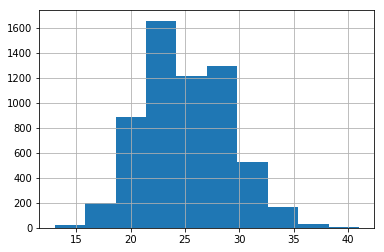

In [3]:
short_breaks = stats.poisson.rvs(loc=10, mu=15, size=6000) 
pd.Series(short_breaks).hist()

我们将它们合并在一起，得到总体：

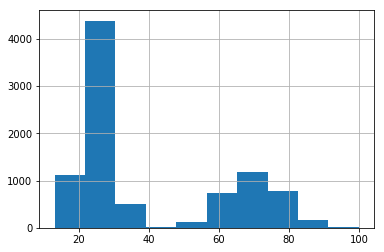

In [4]:
breaks = np.concatenate((long_breaks, short_breaks))
pd.Series(breaks).hist()

In [5]:
breaks.mean()

39.99944444444444

我们的总体是9000名员工，总体的参数是`40 min`。 在现实世界中，多方面的原因导致我们没有足够资源调查每位员工的休息时长，需要使用`点估计`的方法对总体参数进行估计。 

下面我们随机抽取100人，计算他们的平均休息时长：

In [6]:
sample_breaks = np.random.choice(a = breaks, size=100)
breaks.mean() - sample_breaks.mean()

0.6994444444444454

虽然样本数量只占总体的`1/90`，但估计的参数值和真实参数值的差异不大。

我们还可以用同样方法估计总体的`比例`(proportion)。比例指两个数值的比率。

假设公司有10000名员工，其中白人`20%`，黑人`10%`，西班牙人`10%`，亚洲人`30%`， 剩余`30%`来自其他地方。随机选取1000人的样本，对比总体和样本的种族比例是否接近。

In [7]:
employee_races = (["white"]*2000) + (["black"]*1000) +(["hispanic"]*1000) + (["asian"]*3000) + (["other"]*3000)
demo_sample = random.sample(employee_races, 1000)

for race in set(demo_sample):
    print( race + " proportion estimate:" ) 
    print( demo_sample.count(race)/1000. )

asian proportion estimate:
0.29
white proportion estimate:
0.21
other proportion estimate:
0.29
black proportion estimate:
0.101
hispanic proportion estimate:
0.109


从以上结果可以看出，种族比例的估计值和总体的真实分布非常接近。

## 8.2 抽样分布
很多假设检验都要求数据服从正态分布。遗憾的是现实世界中大部分数据并不服从正态分布(吃惊吗？)。以员工休息时长数据为例，你可能认为我是随机选取了泊松分布，但实际上我是刻意的—我希望得到非正态分布数据：

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f029c8da4e0>]],
      dtype=object)

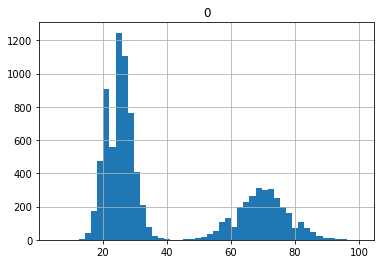

In [8]:
pd.DataFrame(breaks).hist(bins=50,range=(5,100))

数据不服从正态分布，看起来像是`双峰分布`(bi-modal)，两个凸起点分别位于`25 min`和`70 min`附近。由于数据不呈正态分布，所以很多常用的统计检验都无法使用。但是，我们有办法将以上数据转换为正态分布。

首先需要了解什么是`抽样分布`(sampling distribution)。抽样分布是多个大小相同的样本的点估计的分布。我们通过以下方法模拟抽样分布：
1. 随机生成500个样本，每个样本大小为100
2. 对以上500个点估计做直方图(看看它们的分布)

虽然样本大小100是随意确定的，但它需要足够大，以体现总体的分布特征。样本数量500也是随意确定的，但它也需要足够大，以便能够生成正态分布。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f029c7c7710>]],
      dtype=object)

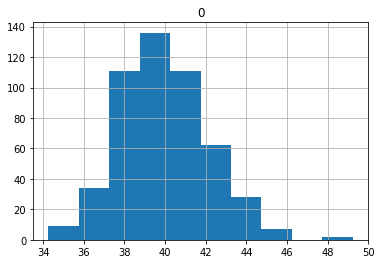

In [9]:
point_estimates = []

# Generate 500 samples
for x in range(500): 
    #take a sample of 100 points
    sample = np.random.choice(a= breaks, size=100) 
    # add the sample mean to our list of point estimates
    point_estimates.append(sample.mean()) 
    
pd.DataFrame(point_estimates).hist()

虽然原始数据是双峰分布，但样本均值的抽样分布是正态分布。请注意，上图是500个随机样本的平均休息时间分析，每个样本含有100人。换句话说，抽样分布是多个点估计的分布。

抽样分布之所以呈正态分布是因为`中心极限定理`(central limit theorem)。

随着我们增大样本的数量，`抽样分布`(点估计的分布)将逐渐趋向正态分布。而且，随着样本数量越来越多，样本均值的分布将越来越接近真实的均值，如下所示：

In [10]:
breaks.mean() - np.array(point_estimates).mean()

0.04232444444443928

这是一个非常有意思的结果。根据中心极限定理，我们通过多个点估计得到的值比单个点估计更接近真实值。

> 通常来讲，随着我们增大样本的数量，估计值将逐渐接近真实值。

## 8.3 置信区间
`点估计`可以估算总体的参数和抽样分布，但存在两个重要问题：
1. 单个点估计非常容易出错(由于样本偏差等原因)
2. 计算多个固定大小样本的抽样分布是不可行的，有时甚至比直接计算总体参数还难

因此，我们引入统计学中非常重要的一个概念—`置信区间`(confidence intervals)。`置信区间`是一个区间值，是指在给定置信水平下，该区间将包含总体参数。`置信水平`是高等统计学最重要的概念之一，它经常被误解。非正式地说，`置信水平`并不是结果`正确的概率`，相反，它表示结果`准确的频率`。比如，假设我们希望每一次点估计都能以$95\%$的概率得到准确的总体参数，那么置信水平需要设置为$95\%$。

> 较高的置信水平将导致置信区间变得更广

为了得到置信区间，我们需要找到`点估计`和`误差幅度`(margin of error)。`误差幅度`指我们能接受的点估计的误差范围，它依赖于`置信区间`、`数据的方差`和`样本大小`。

有很多方法可以计算置信区间，我们将用最简单的方法计算总体均值的置信区间。为了计算置信区间，我们需要：
+ 点估计，比如样本的平均休息时长
+ 总体标准差的估计值，它表示数据的离散程度，即通过样本标准差除以总体大小的平方根计算
+ 自由度(样本大小减1)

以上数据可能看起来有点随意，但请相信我，这都是有原因的。

用Python内置的模块计算置信区间：

In [11]:
# the size of the sample we wish to take
sample_size = 100 
# a sample of sample_size taken from the 9,000 breaks population from before
sample = np.random.choice(a = breaks, size = sample_size) 
# the sample mean of the break lengths sample
sample_mean = sample.mean() 
# sample standard deviation
sample_stdev = sample.std() 
# population standard deviation estimate
sigma = sample_stdev/math.sqrt(sample_size) 

stats.t.interval(alpha = 0.95,          # Confidence level 95% 
                df= sample_size - 1,    # Degrees of freedom 
                loc = sample_mean,      # Sample mean 
                scale = sigma)          # Standard deviation

(36.29263468910625, 45.26736531089375)

再次强调，区间`36.36`至`45.44`是置信水平为$95\%$时，平均休息时长的置信区间。我们已知总体的参数是`39.99`，置信区间包含了总体的参数。

> **置信水平不是区间准确的百分比，而是区间包含总体参数的概率**

为了更好地理解置信水平，下面我们计算10000个置信区间，然后计算总体参数包含在置信区间的概率。我们先创建一个生成置信区间的函数：

In [12]:
# function to make confidence interval 
def makeConfidenceInterval():
    sample_size = 100 
    sample = np.random.choice(a= breaks, size = sample_size)
    sample_mean = sample.mean() 
    sample_stdev = sample.std() 
    sigma = sample_stdev/math.sqrt(sample_size) 
    return stats.t.interval(alpha = 0.95, df= sample_size - 1, loc = sample_mean, scale = sigma)

我们来检验该置信区间包含总体参数`39.99`的概率：
1. 生成10000个样本的置信区间
2. 计算置信区间包含总体参数的次数
3. 用置信区间包含总体参数的次数除以10000

In [13]:
times_in_interval = 0. 

for i in range(10000):
    interval = makeConfidenceInterval() 
    if 39.99 >= interval[0] and 39.99 <= interval[1]:
        times_in_interval += 1
times_in_interval / 10000

0.9472

结果表明接近$95\%$的置信区间都包含了总体均值，说明通过点估计和置信区间估计总体参数是一个相对简单和有效的统计推理。

下面我们来看随着置信水平的改变，置信区间大小如何变化。我们预期随着置信水平的提高，置信区间将随之增大，以提高包含总体参数的概率：

In [14]:
for confidence in (.5, .8, .85, .9, .95, .99):
    confidence_interval = stats.t.interval(alpha = confidence,  df = sample_size-1,  loc = sample_mean,  scale = sigma)
    length_of_interval = round(confidence_interval[1]-confidence_interval[0], 2)
    print("confidence {0} has a interval of size {1}".format(confidence, length_of_interval))

confidence 0.5 has a interval of size 3.06
confidence 0.8 has a interval of size 5.84
confidence 0.85 has a interval of size 6.56
confidence 0.9 has a interval of size 7.51
confidence 0.95 has a interval of size 8.97
confidence 0.99 has a interval of size 11.88


## 8.4 假设检验
`假设检验`(hypothesis tests)是统计学中应用最广泛的检验方法之一。它有多种形式，但目的都是一致的。

`假设检验`是一种统计学检验，用来确定对于总体中给定的样本，我们是否能够接受某一特定假设。本质上，`假设检验`是一种关于总体的某种假设的检验。检验的结果将告诉我们是否可以信任原假设，或拒绝原假设，接受备择假设。`假设检验`的核心是确定样本数据的特征是否背离了总体。

`假设检验`通常有两个相反的假设，我们称之为`原假设`(null hypothesis)和`备择假设`(alternative hypothesis)。`原假设`是被检验的假设，也是默认正确的假设，它是实验的出发点。`备择假设`通常是与原假设相反的假设。`假设检验`结果将告诉我们哪个假设值得信任。

`假设检验`根据样本数据决定是否应该拒绝原假设。我们通常基于$p$值(依赖于`置信水平`)做出决定。

> 一个常见的错误想法是统计学的假设检验被设计用来从两个相似的假设中做选择。这是不正确的。假设检验默认原假设是正确的，除非有足够的数据支持备择假设

以下是几个可以用假设检验进行回答的问题：
+ 平均休息时长是否不等于40min？ 
+ 使用网页A的用户和使用网页B的用户是否存在差异(`A/B测试`)？
+ 样本咖啡豆的味道和总体咖啡豆的味道是否有显著差异？

### 8.4.1 实施假设检验
假设检验有多种不同的方法，它们的实施方式和指标也各不相同。尽管如此，所有的假设检验都包含以下5个最基本步骤：
1. 明确假设
    - 我们在这一步形成两个假设：原假设和备择假设
    - 通常用符号$H_0$表示原假设，符号$H_a$表示备择假设

2. 决定被检验样本的大小
    - 样本大小取决于被选择的检验类型。样本大小必须合适，并服从中心极限定理和数据正态性假设

3. 选择置信水平(用符号$\alpha$标记)
    - 通常用0.05的显著性水平
    
4. 收集数据
    - 收集检验所需的样本数据

5. 决定是否接受或拒绝原假设
    - 这一步取决于假设检验的类型。最终结果可能是接受原假设，也可能是放弃原假设

我们将介绍3种最常用的假设检验：
+ 单样本$t$检验(one samplet-tests)
+ 卡方拟合度检验(Chi-square test for goodness of fit test)
+ 卡方相关性/独立性检验(Chi-square test for association/independence)

在选择检验方法时，最需要考虑的因素是被检验数据的类型—连续型数据，还是分类数据。

### 8.4.2 单样本t检验
对于连续型数据，我们选择$t$检验。单样本$t$检验是一种用于检验样本(数值型)是否和另一个数据集(总体或其他样本)具有显著性差异的统计检验方法。

继续使用平均每天休息时长案例，以下代码模拟工程部的平均休息时长：

In [15]:
long_breaks_in_engineering = stats.poisson.rvs(loc=10, mu=55, size=100)
short_breaks_in_engineering = stats.poisson.rvs(loc=10, mu=15, size=300)

engineering_breaks = np.concatenate((long_breaks_in_engineering, short_breaks_in_engineering))
engineering_breaks.mean(), breaks.mean()

(35.44, 39.99944444444444)

其中：
+ 此次生成的泊松分布样本较小(400人)
+ 参数$\mu$被设置为55而不是之前的60，以确保工程部的平均休息时长和整个公司不一致

从运行结果看出，工程部的平均休息时长和整个公司有显著差异。

> **注意**
> 在真实场景下，我们通常无法获取总体和总体参数。为了更好地讲解，本书特意模拟和计算了总体参数，以便我们能够看出样本和总体的差异

现在，假设我们对总体参数一无所知，需要依靠统计检验方法验证两者是否存在显著性差异。

##### 案例：单样本t检验
我们的目标是验证总体(全公司)的平均休息时长是否和工程部门的平均休息时长存在显著性差异。

我们在$95\%$置信水平上进行单样本$t$检验。理论上说，检验结果将告诉我们样本和总体是否有相同的分布特征。

##### 单样本t检验的假设
有必要先了解$t$检验需要满足的条件：
+ 总体要满足正态分布，或样本大小至少大于30
+ 总体大小至少是样本大小的10倍，以确保样本是独立随机样本

**注意**，$t$检验要求要么总体呈正态分布(我们知道这是不现实的)，要么样本含有的数据点超过30个，这些条件都是为了确保数据的正态性。同时，$t$检验还要求样本独立，这可以通过取少量样本实现。总之，$t$检验的基本要求是，样本既要足够大以保持正态性，又要相对总体足够小以保持独立性。这听起来不可思议，不是吗？

我们按照之前介绍的5个步骤进行$t$检验。

**1. 明确假设**   
我们假设$H_0 = 工程部平均休息时长和公司平均休息时长相同$。$H_0$是我们的`原假设`(null hypothesis)，它是我们在没有数据作支撑时认为成立的假设。与之相对应，我们还有`备择假设`(alternative hypothesis)。

可以有多个备择假设，比如，我们可以认为工程部的平均值低于或高于公司的平均值，或者不等于公司的平均值：
+ 如果我们想知道工程部的平均值是否不等于公司的平均值，这属于`双尾检验`(two-tailedtest)，此时的备择假设如下：
    - $H_a = 工程部平均休息时长不等于公司平均休息时长$

+ 如果我们想知道工程部的平均值低于或高于公司的平均值，这属于`单尾检验`(one-tailedtest)，此时的备择假设如下：
    - $H_a = 工程部平均休息时长低于公司平均休息时长$
    - $H_a = 工程部平均休息时长高于公司平均休息时长$

单尾检验和双尾检验的区别在于得到的结果是否需要除以2。除此之外，两者的检验过程完全一致。

这里我们选择双尾检验，判断工程部平均休息时长是否等于公司平均休息时长。

**2. 决定被检验样本的大小**   
大多数检验方法都要求数据呈正态分布，或者样本具有合适的大小：
+ 样本至少含有30个数据点(本例中样本有400人)
+ 样本占总体的比例低于$10\%$(本例中总体有9000人) 

**3. 选择显著性水平(用$\alpha$表示)**   
+ 选择显著性水平$95\%$，即$\alpha$值等于$1-0.95 = 0.05$

**4. 收集数据**   
这一步已经完成，我们用两个泊松分布生成了数据。

**5. 决定是否接受或拒绝原假设**    
最后一步随假设检验类型的不同而不同。对于单样本$t$检验，我们需要计算两个值：检验统计量和$p$值。

检验统计量是根据样本数据计算的一个数值，我们通常根据它决定是否应该拒绝原假设。检验统计量也用于将观测值和原假设预期得到的结果进行比较。$p$值是观测值出现的概率，它通常和检验统计量一起使用。当有强烈的证据拒绝原假设时，检验统计量通常非常大(正负皆可)，$p$值通常非常小。这意味着检验结果非常可靠，而不是随机出现的结果。

对于$t$检验，$t$值就是我们的检验统计量，代码如下：

In [16]:
t_statistic, p_value = stats.ttest_1samp(a = engineering_breaks, popmean = breaks.mean())
t_statistic, p_value

(-4.90084434978126, 1.3902828671063965e-06)

结果显示$t$值等于$-5.742$，它表示原假设中样本均值的偏离程度。$p$值用于体现检查结果是否可靠，它是我们最终做出结论的依据。如果$p$值等于$0.06$，说明我们有$6\%$的概率得到这个结果，也就是说，有$6\%$的样本可以得出这样的结果。

我们需要将$p$值和显著性水平进行对比：
+ 如果$p$值低于显著性水平，则拒绝原假设
+ 如果$p$值高于显著性水平，则接受原假设

我们的$p$值低于显著性水平$0.05$，因此我们拒绝原假设，接受备择假设，即工程部的平均休息时长不等于公司平均休息时长。

> 对$p$值的使用存在一些争议。很多出版物已经禁止用$p$值表示显著性，主要原因是$p$值的含义。假设$p$值等于0.04，那么数据恰好得出该结果的概率是$4\%$，而不是任何情况下的显著性水平。$4\%$不是一个可以忽略的小数！正因为如此，很多人转向使用其他检验统计量。然而这并不意味着$p$值毫无用处，只说明我们必须谨慎地使用$p$值，弄清楚它究竟意味着什么

还有其它类型的$t$检验，比如`单尾检验`、`配对检验`(paired test)和`双样本t检验`。